In [1]:
#https://github.com/benmiroglio/pymatch
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
raw_data = pd.read_csv('psm_1.csv')

In [3]:
raw_data = raw_data.iloc[:,:-1]

In [4]:
raw_data.head()

,order_id,duty,driver_id,product_id,city_id,normal_distance,a_birth_time,normal_time,gmv,is_anycar,...,sum_d_five_star,sum_d_becompliant,sum_d_compliant,sum_d_pic,first_uid,second_uid,apr_uid,diff_birth_time,diff_work_time,final_uid
0,35193132307151,0,565592723952077,3,17,13.3,2019/1/7 18:26,43,43.00,0,...,34.0,0.0,0.0,0.0,167832.0,NaN,NaN,7.231134,957.537326,167832
1,17620018777491,0,580542353367202,3,23,11.3,2018/12/31 17:31,25,30.95,0,...,57.0,4.0,2.0,0.0,172066.0,NaN,NaN,14.269213,279.502546,172066
2,17620229173446,0,564692343722205,3,2,2.8,2019/1/2 18:33,12,17.44,0,...,29.0,0.0,0.0,0.0,172642.0,NaN,NaN,12.226331,999.662315,172642
3,17620274610066,0,580542425736364,3,2,22.2,2019/1/3 10:48,41,70.70,0,...,21.0,0.0,0.0,0.0,172642.0,NaN,NaN,11.549074,234.423762,172642
4,17620389878664,1,580542320061463,3,23,8.8,2019/1/4 18:36,11,19.14,0,...,81.0,1.0,0.0,0.0,173824.0,172658.0,NaN,10.223843,325.525174,172658


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 26 columns):
order_id             5524 non-null int64
duty                 5524 non-null int64
driver_id            5524 non-null int64
product_id           5524 non-null int64
city_id              5524 non-null int64
normal_distance      5524 non-null float64
a_birth_time         5524 non-null object
normal_time          5524 non-null int64
gmv                  5524 non-null float64
is_anycar            5524 non-null int64
work_time            5524 non-null object
team_id              5524 non-null int64
biz_status           5524 non-null int64
sp_flag              5524 non-null int64
is_valid             5524 non-null int64
driver_grade         5524 non-null int64
sum_d_five_star      5483 non-null float64
sum_d_becompliant    5483 non-null float64
sum_d_compliant      5483 non-null float64
sum_d_pic            5483 non-null float64
first_uid            333 non-null float64
second_uid       

In [6]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns ={0: 'Missing Value', 1: '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + " columns.\n"
          'There are ' + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(raw_data)


Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Value,% of Total Values
second_uid,5413,98.0
first_uid,5191,94.0
apr_uid,333,6.0
sum_d_five_star,41,0.7
sum_d_becompliant,41,0.7
sum_d_compliant,41,0.7
sum_d_pic,41,0.7


In [7]:
def imbalanced_degree(df):
    res = []
    for col in df.columns:
        res.append({"feature":col,"imbalanced_degree":df[col].value_counts().max()/len(df[col])})
        temp = pd.DataFrame(res)
        temp = temp.sort_values(by=['imbalanced_degree'],ascending=False)
        
    return temp

In [8]:
imbalance_check = imbalanced_degree(raw_data)
imbalance_check

,feature,imbalanced_degree
12,biz_status,0.997828
13,sp_flag,0.997285
19,sum_d_pic,0.992578
9,is_anycar,0.958726
3,product_id,0.956915
15,driver_grade,0.941890
1,duty,0.906770
18,sum_d_compliant,0.705286
11,team_id,0.652607
14,is_valid,0.523353


In [9]:
# check how many columns contains only one unique value
def unique_value_check(df):
    r = []
    for col in df.columns:
        if len(df[col].value_counts())<=1:
            r.append(col)
    return r

In [10]:
unique_check = unique_value_check(raw_data)
unique_check

['sum_d_pic']

In [11]:
# create a data copy
df = raw_data.copy()

In [12]:
# delete all the cols that only contain one value and extreme imbalanced class
cols_to_drop = ['a_birth_time','work_time','first_uid','second_uid','apr_uid','sum_d_pic','biz_status','is_anycar','sp_flag']
df = df.drop(cols_to_drop,axis=1)

In [13]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 3 columns that have missing values.


,Missing Value,% of Total Values
sum_d_five_star,41,0.7
sum_d_becompliant,41,0.7
sum_d_compliant,41,0.7


In [14]:
df = df.fillna(df.mean())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 17 columns):
order_id             5524 non-null int64
duty                 5524 non-null int64
driver_id            5524 non-null int64
product_id           5524 non-null int64
city_id              5524 non-null int64
normal_distance      5524 non-null float64
normal_time          5524 non-null int64
gmv                  5524 non-null float64
team_id              5524 non-null int64
is_valid             5524 non-null int64
driver_grade         5524 non-null int64
sum_d_five_star      5524 non-null float64
sum_d_becompliant    5524 non-null float64
sum_d_compliant      5524 non-null float64
diff_birth_time      5524 non-null float64
diff_work_time       5524 non-null float64
final_uid            5524 non-null int64
dtypes: float64(7), int64(10)
memory usage: 733.7 KB


In [16]:
'''
# change numerical cols to categorical cols
cat_cols = [
    #'duty',
    #'product_id',
    #'city_id',
    #'team_id',
    #'is_valid',
    #'driver_grade',
    #'final_uid'
]
for col in cat_cols:
    df[col] = df[col].astype('object')
'''

"\n# change numerical cols to categorical cols\ncat_cols = [\n    #'duty',\n    #'product_id',\n    #'city_id',\n    #'team_id',\n    #'is_valid',\n    #'driver_grade',\n    #'final_uid'\n]\nfor col in cat_cols:\n    df[col] = df[col].astype('object')\n"

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 17 columns):
order_id             5524 non-null int64
duty                 5524 non-null int64
driver_id            5524 non-null int64
product_id           5524 non-null int64
city_id              5524 non-null int64
normal_distance      5524 non-null float64
normal_time          5524 non-null int64
gmv                  5524 non-null float64
team_id              5524 non-null int64
is_valid             5524 non-null int64
driver_grade         5524 non-null int64
sum_d_five_star      5524 non-null float64
sum_d_becompliant    5524 non-null float64
sum_d_compliant      5524 non-null float64
diff_birth_time      5524 non-null float64
diff_work_time       5524 non-null float64
final_uid            5524 non-null int64
dtypes: float64(7), int64(10)
memory usage: 733.7 KB


In [18]:
df.duty.value_counts()

0    5009
1     515
Name: duty, dtype: int64

In [19]:
test = df[df.duty==1]
control = df[df.duty==0]

In [20]:
m = Matcher(test,control,yvar="duty",exclude=["order_id","driver_id","product_id","city_id","team_id","is_valid","driver_grade"])

Formula:
duty ~ normal_distance+normal_time+gmv+sum_d_five_star+sum_d_becompliant+sum_d_compliant+diff_birth_time+diff_work_time+final_uid
n majority: 5009
n minority: 515


In [21]:
# for reproducibility
np.random.seed(20190101)

m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 58.24%


In [22]:
m.predict_scores()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


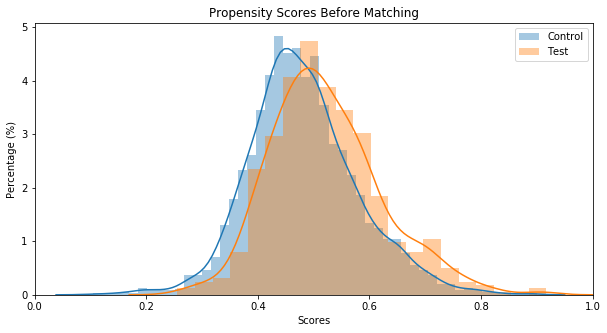

In [23]:
m.plot_scores()

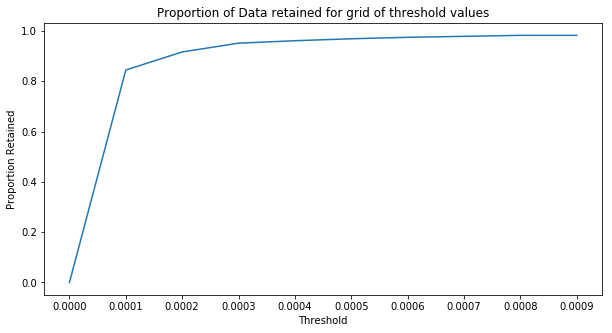

In [24]:
m.tune_threshold(method='random')

In [25]:
m.match(method='min',nmatches=1,threshold=0.008)
m.record_frequency()

,freq,n_records
0,1,955
1,2,33
2,3,3


In [26]:
m.assign_weight_vector()

In [27]:
mm = m.matched_data.sort_values("match_id")

In [28]:
#categorical_results = m.compare_categorical(return_table=True)

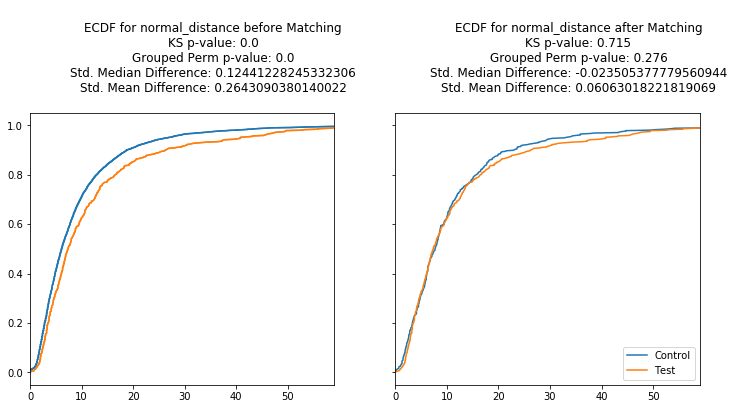

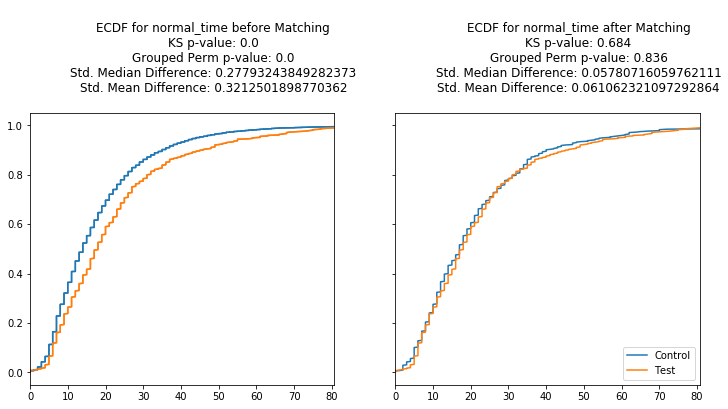

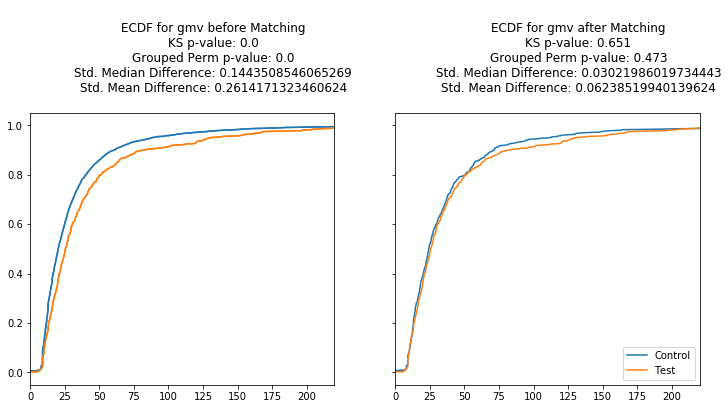

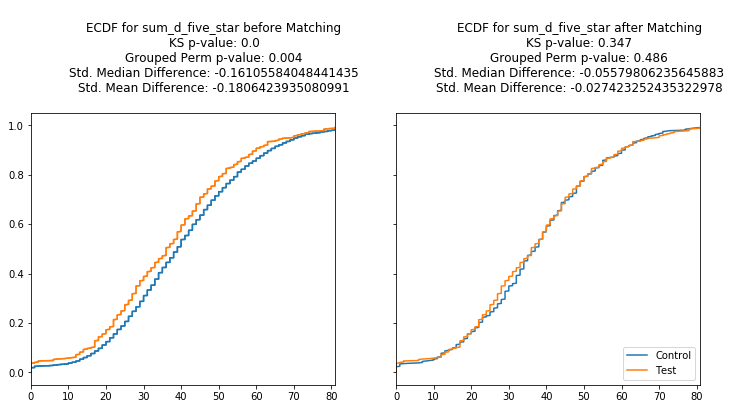

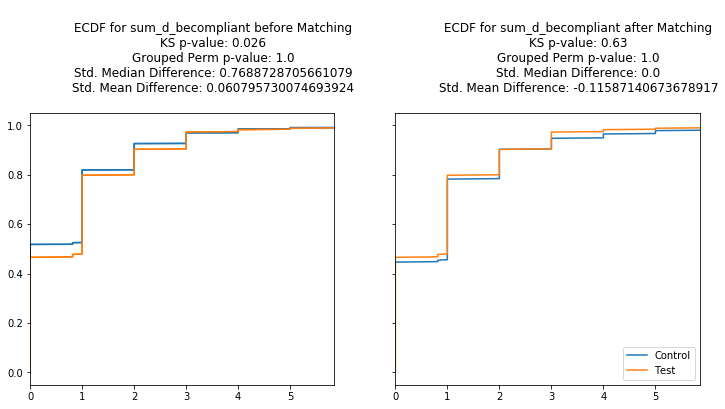

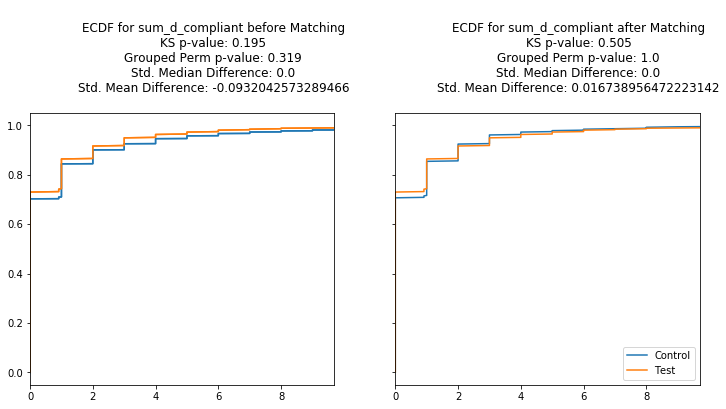

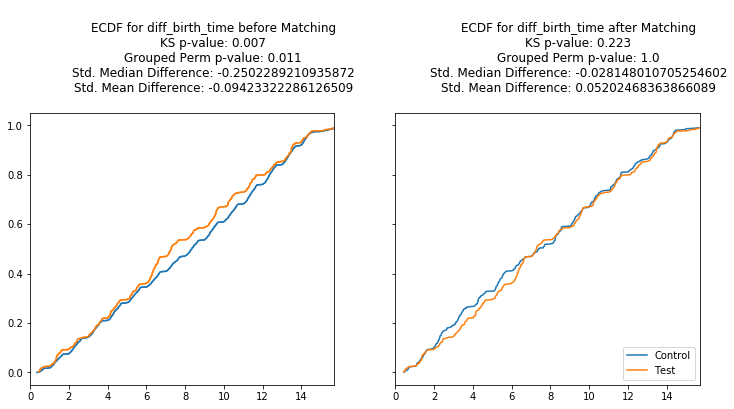

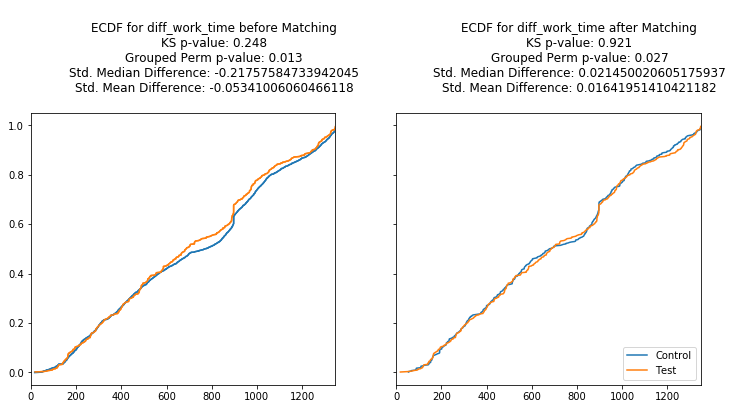

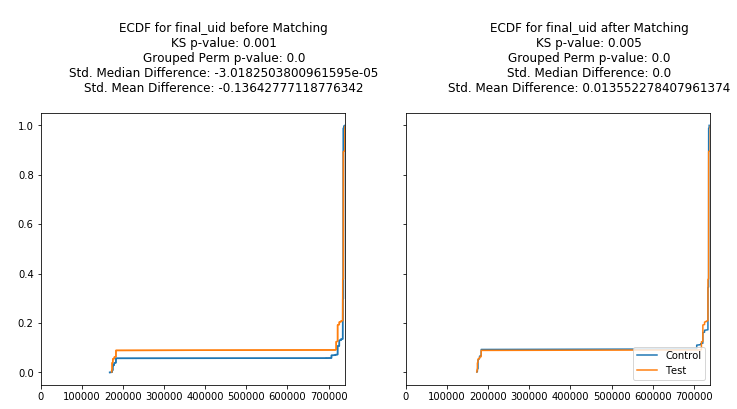

In [29]:
cc = m.compare_continuous(return_table=True)